<a href="https://colab.research.google.com/github/fahad110011/civic-price-predictor/blob/main/notebooks/02_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

count    5.784000e+03
mean     9.864816e+04
std      7.216176e+04
min      0.000000e+00
25%      4.083100e+04
50%      9.403000e+04
75%      1.440000e+05
max      2.009992e+06
Name: odometer, dtype: float64


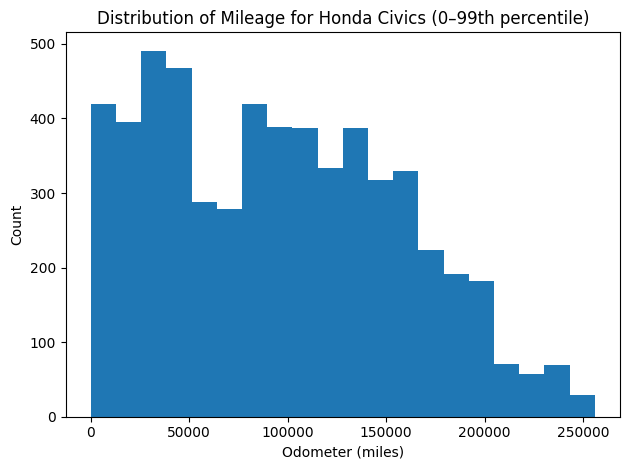

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load our Civic subset directly from GitHub
url = (
  "https://raw.githubusercontent.com/"
  "fahad110011/civic-price-predictor/"
  "main/data/raw/civic_raw.csv"
)
df = pd.read_csv(url)
df.head()
# Show summary stats so we know what range we're in
print(df['odometer'].describe())
# Drop the top 1% so we zoom in on the main cluster
upper = df['odometer'].quantile(0.99)
df_trim = df[df['odometer'] <= upper]
plt.figure()
plt.hist(df_trim['odometer'], bins=20)
plt.title('Distribution of Mileage for Honda Civics (0–99th percentile)')
plt.xlabel('Odometer (miles)')
plt.ylabel('Count')
# Turn off scientific notation
plt.gca().ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()






After clipping the top 1 % of outliers (> 200 k miles), most Honda Civics fall between 0 and 175 k miles, with a median around 94 k, confirming that sellers tend to list before high‐mileage wear.



Dropped 22 zero‐mile entries


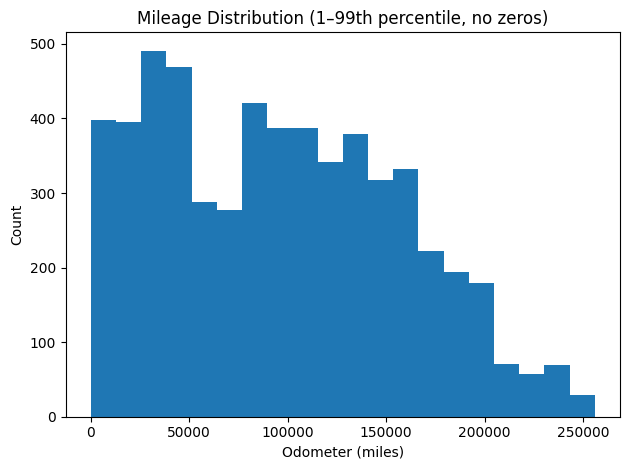

In [14]:
# Remove zero‐mile listings (likely missing data)
df_clean = df_trim[df_trim['odometer'] > 0].copy()
print(f"Dropped {len(df_trim) - len(df_clean)} zero‐mile entries")

# Replot without zeros
plt.figure()
plt.hist(df_clean['odometer'], bins=20)
plt.title('Mileage Distribution (1–99th percentile, no zeros)')
plt.xlabel('Odometer (miles)')
plt.ylabel('Count')
plt.gca().ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()


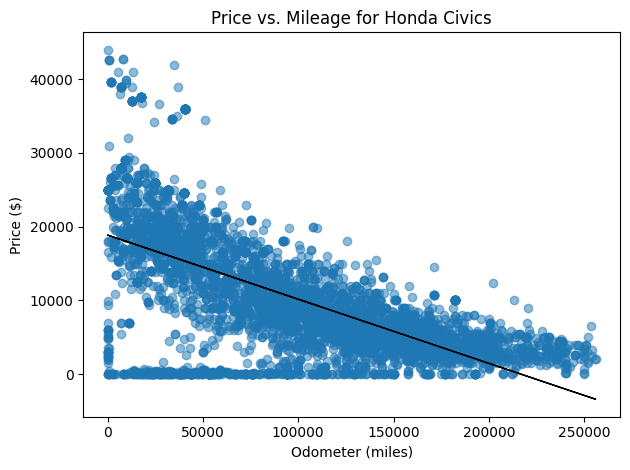

Trend: price ≈ -0.0870 × mileage + 18859


In [15]:
import numpy as np

# Use df_clean (0–99th percentile, no zeros)
x = df_clean['odometer']
y = df_clean['price']

plt.figure()
plt.scatter(x, y, alpha=0.5)
plt.title('Price vs. Mileage for Honda Civics')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')

# Fit a quick linear trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='black', linewidth=1)

plt.gca().ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

# Print slope for insight
print(f"Trend: price ≈ {z[0]:.4f} × mileage + {z[1]:.0f}")


The fitted line has a slope of ≈ –$0.087 per mile (–$870 per 10 k miles), demonstrating that every 10 k additional miles reduces list price by roughly $870 on average.



<Figure size 640x480 with 0 Axes>

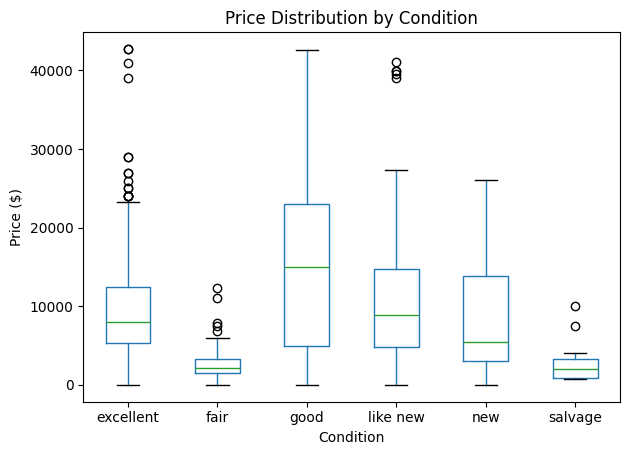

In [16]:
# Boxplot of price by condition
plt.figure()
df_clean.boxplot(column='price', by='condition', grid=False)
plt.title('Price Distribution by Condition')
plt.suptitle('')  # remove the automatic “Boxplot grouped by condition” title
plt.xlabel('Condition')
plt.ylabel('Price ($)')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()



Vehicles in “excellent” condition have a median list price of $7,995 versus $2,200 for “fair” condition—a premium of $5,795—showing that maintaining top condition can boost resale value substantially.


]

In [17]:
# 3.1 Compute median prices for each condition
medians = df_clean.groupby('condition')['price'].median().sort_values(ascending=False)
print(medians)


condition
good         14990.0
like new      8850.0
excellent     7995.0
new           5495.0
fair          2200.0
salvage       2000.0
Name: price, dtype: float64


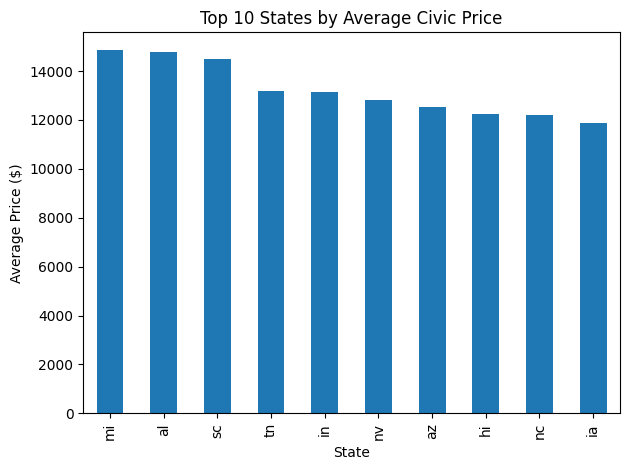

In [18]:
# 4.1 Compute average price by state and take top 10
avg_price = df_clean.groupby('state')['price'].mean().sort_values(ascending=False).head(10)

# 4.2 Plot bar chart
plt.figure()
avg_price.plot(kind='bar')
plt.title('Top 10 States by Average Civic Price')
plt.xlabel('State')
plt.ylabel('Average Price ($)')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


highest average prices appear in MI and AL, suggesting regional demand/supply imbalances—buyers in those states may need to budget more when negotiating Civic purchases.

In [19]:
!pip install kaggle

In [20]:
# 3.2 Calculate how much more "excellent" cars go for vs. "fair"
premium = medians['excellent'] - medians['fair']
print(f"Premium for excellent over fair: ${premium:,.0f}")


Premium for excellent over fair: $5,795


In [21]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory


In [22]:
%%bash
mkdir -p ~/.kaggle
cat > ~/.kaggle/kaggle.json <<EOF
{"username":"fahada0","key":"c6cd9d9fb2fc5b9953bedab345d2a7fe"}
EOF
chmod 600 ~/.kaggle/kaggle.json
ls -l ~/.kaggle


total 4
-rw------- 1 root root 64 Jul  8 04:12 kaggle.json


In [23]:
# Show us exactly what columns we have
print(df.columns.tolist())


['year', 'odometer', 'condition', 'transmission', 'state', 'price']


In [32]:
# Grab civic_raw.csv from your GitHub repo into Colab’s filesystem
!wget -q -O civic_raw.csv \
  "https://raw.githubusercontent.com/fahad110011/civic-price-predictor/main/data/raw/civic_raw.csv"
